In [1]:
%cd C:\Users\yukir\Documents\GitHub\Text_Mining\py

from nlp_processing import *
from text_preprocessing import *
set_global_determinism(seed=1337)

%cd C:\Users\yukir\Documents\Monicas_workspace\mega_trend

C:\Users\yukir\Documents\GitHub\Text_Mining\py
True
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16554138844654745884
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7499356472621994646
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9883535296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12967871373559808854
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 8242957289730353584
physical_device_desc: "device: XLA_GPU device"
]
tf 2.2.0
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라


C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\scipy\io\matlab\mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from .mio5_utils import VarReader5


C:\Users\yukir\Documents\Monicas_workspace\mega_trend


Text(0.5, 1.0, '안녕')

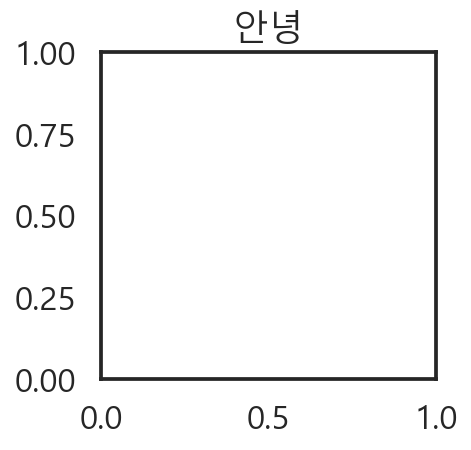

In [2]:
plt.figure(figsize = (3,3))
plt.rc('font', family='Malgun Gothic') 
%config InlineBackend.figure_format = 'retina'
plt.title("안녕")

### **PREPROCESSING_1**
띄어쓰기 체크하기  
중복데이터 제거  
제거된 중복 단어 중 살릴 거 살리기


In [3]:
from nltk.corpus import stopwords  
stopwords.words('korean')[:10] 

stopwords_kor = stopwords.words('korean')

In [4]:
def clean_text(text): 
    """ 한글, 영문, 숫자만 남기고 제거한다. 
    :param text: 
    :return: 
    """ 
    text = text.replace(".", " ").strip() 
    text = text.replace("·", " ").strip()
    pattern = '[^ ㄱ-ㅣ가-힣|0-9|a-zA-Z]+' 
    text = re.sub(pattern=pattern, repl='', string=text) 
    return text 
    
def get_nouns(tokenizer, sentence): 
    """ 단어의 길이가 2이상인 일반명사(NNG),
     고유명사(NNP), 외국어(SL)만을 반환한다. 
     :param tokenizer: 
     :param sentence: :return: """ 
    tagged = tokenizer.nouns(sentence)
    nouns = [s for s in tagged if len(s)>1] 
     
    return nouns 
     
def tokenize(clean_example): 
    tokenizer = okt
    processed_data = [] 
    for sent in tqdm(clean_example):
        sentence = clean_text(sent.replace('\n', '').strip()) 
        processed_data.append(get_nouns(tokenizer, sentence)) 
        
    return processed_data
    
    
def save_processed_data(processed_data): 
    """ 토큰 분리한 데이터를 csv로 저장 :param processed_data: :return: """ 
    
    with open('tokenized.csv', 'w', newline='', encoding='utf-8') as f: 
        writer = csv.writer(f) 
        for data in processed_data:
             writer.writerow(data)

In [5]:
from konlpy.tag import Okt
okt = Okt()

In [6]:
import os
import sys

file_list = os.listdir('data\\txt')
file_list

['2018년도 보건복지부 R&D 사업 통합 시행계획(안).txt',
 '2020년도 보건복지부 R&D 사업 통합 시행계획(안).txt',
 '2021년도 보건복지부 R&D 사업 통합 시행계획(안).txt',
 '2022년도 보건복지부 R&D 사업 통합 시행계획(안).txt',
 '★ (18_22) 제2차 보건의료기술육성기본계획(안)_바이오특위.txt',
 '제2차 보건의료기술육성기본계획(18-22) 2018년도 시행계획(안).txt',
 '제2차 보건의료기술육성기본계획(18-22) 2019년도 시행계획(안).txt',
 '제2차 보건의료기술육성기본계획(18-22) 2020년도 시행계획(안).txt',
 '제2차 보건의료기술육성기본계획(18-22) 2021년도 시행계획(안).txt']

In [7]:
from tqdm import tqdm

In [96]:
data_lines = []

for i in tqdm (file_list):
    f = open('data\\txt\\'+i, encoding = 'utf-8')
    lines=f.readlines()
    for k in lines:
        k = clean_text(k)
        # text = re.sub('\n','',k)
        # print(text)
        k = k.strip() #앞뒤 공백제거
        k = k.replace('\n','') #개행제거
        p = re.compile("[^0-9]") #숫자제거
        k = ("".join(p.findall(k)))
        if k==[] or '':
            pass
        elif k=='':
            pass
        elif len(k)<=2:
            pass
        else:   
            data_lines.append(k)


len(data_lines)

100%|██████████| 9/9 [00:00<00:00, 20.83it/s]


40042

In [72]:
### 오래걸림_안하는게 좋을 지도
 
from hanspell import spell_checker
space_check=[]

for i in tqdm (data_lines):
    i = i.replace(' ','')
    k = spell_checker.check(i)
    j = k.checked
    space_check.append(j)

100%|██████████| 40042/40042 [30:23<00:00, 21.96it/s]  


In [80]:
## 나오는 문장의 수를 확인해서 전처리 필요
k= 0
for num, i in tqdm (enumerate(space_check)):
    if '만성병' in i:
        print('-', num, i)
        k +=1

print('\n등장횟수', k)

40042it [00:00, 2104430.95it/s]

- 368 만성병 관리 기술 희귀질환 연구 인프라 구축 RD
- 444 만성병 관리 기술 개발연구
- 552 만성병 관리 기술 개발연구
- 975 만성병 관리 기술 개발연구
- 1897 만성병 관리 기술 개발연구 세부
- 1901 만성병 관리 기술 개발연구 RD
- 1908 알코올 기인 만성병 연구
- 1910 주요 만성병과 난치성 만성 질환 진단조사 예방 관리 기술 실험 표준 등 연구소 행
- 2174 만성병 관리 기술 개발연구
- 2687 만성병
- 2688 만성병 관리 기술 개발연구 심혈관 내분비대사 뇌질환 등
- 2772 국민건강스마트관리억돌봄로봇중개연구억라이프케어융합서비스억만성병관리기술억세사회대응고령친화억사회서비스억
- 2785 만성병 관리 기술 개발연구 사업 년 억년 억
- 2890 만성병 관리 기술 개발연구
- 2977 만성병 관리 기술 개발연구
- 3295 만성병 관리 기술 개발연구
- 4128 만성병 관리 기술 개발연구 사업 세부
- 4134 만성병 관리 기술 개발연구
- 4763 만성병 관리 기술 개발연구 등
- 4837 만성병
- 4838 만성병 관리 기술 개발연구
- 4975 만성병 관리 기술 개발연구 사업 년 억년 억
- 4982 만성병 관리 기술 개발연구 사업 년 억년 억
- 5101 만성병 관리 기술 개발연구
- 5204 만성병 관리 기술 개발연구
- 5340 만성병 관리
- 5582 만성병 관리 기술 개발연구
- 6757 만성병 관리 기술 개발연구 사업 세부
- 6764 만성병 관리 기술 개발연구 사업
- 10799 만성병 관리 기술 개발연구
- 10845 질병관리만성병관리보건의료연구인프라공공백신지원센터건립등질병예방및만성질환관리분야투자확대년억원년억원
- 10853 질환 극복 질병예방 만성병 희귀질환 대응 등 질병 극복을 위한 질환 원인 규명 및 대응 방안 마련
- 14359 만성병 관리 기술 개발연구 보건복지부
- 14474 만성병 관리 기술 개발연구
- 14525 만성병 예방관리 진단 및 치료기술 개발을 위한 지식 기반 확대
- 

In [102]:
del_dup = []
yes_dup = []

for  i in space_check:
    if i not in del_dup :
        del_dup.append(i)
    else:
        yes_dup.append(i)

print(len(del_dup))
print(len(yes_dup))

15412
24630


In [103]:
### 삭제된 내용 확인 후 살려야 될 것 확인

yes_dup_pd = pd.DataFrame({'제거된 중복':yes_dup})
yes_dup_pd_k = yes_dup_pd.drop_duplicates('제거된 중복', keep='first')
yes_dup_pd_k.to_excel('제거된 중복단어_확인필요.xlsx', encoding = 'utf-8')
print(len(yes_dup_pd_k))
yes_dup_pd_k.head()

4808


,제거된 중복
0,보건의료 RD 정책여건
1,사회 Social
2,기술 Technology
3,경제 Economy
4,환경 Ecological


### **PREPROCESSING_2**

In [9]:
clean_example = data_lines.copy()

In [10]:
## 오래걸리니까 조심
def tokenize(clean_example): 
    tokenizer = okt
    processed_data = [] 
    for sent in tqdm(clean_example):
        sentence = clean_text(sent.replace('\n', '').strip()) 
        processed_data.append(get_nouns(tokenizer, sentence)) 
        
    return processed_data
    
    
def save_processed_data(processed_data): 
    """ 토큰 분리한 데이터를 csv로 저장 :param processed_data: :return: """ 
    
    with open('tokenized_TFIDF.csv', 'w', newline='', encoding='utf-8') as f: 
        writer = csv.writer(f) 
        for data in processed_data:
             writer.writerow(data)


from tqdm import tqdm 
if __name__ == '__main__':
     # df = pd.read_csv('negative.csv', index_col = 0)
     processed_data = tokenize(clean_example) # description 부분을 토크나이징 한다. 
     
     # 토큰 분리한 데이터를 저장 
     save_processed_data(processed_data)


100%|██████████| 40042/40042 [01:11<00:00, 557.90it/s] 


### **REPLACE NOUNS**

In [32]:
## 나오는 문장의 수를 확인해서 전처리 필요
k= 0
for num, i in tqdm (enumerate(clean_example)):
    if ' 파킨슨' in i:
        print('-', num, i)
        k +=1

print('\n등장횟수', k)

40042it [00:00, 2217812.94it/s]

- 2330 기업체에 기술이전 되어 척수 손상 파킨슨병 등 난치성질환 세포치료제 개발에 활용주에스바이오메딕스 및 미국 등 개국 특허 등록 
- 6779 뇌질환 연구기반 조성 연구 뇌졸중 파킨슨병 등 고령사회 진입으로 인한 뇌질환 증가에 따른 예방 관리 기술개발 및 연구기반 구축
- 7023 와이브레인 우울증 치료제 전자약 국내 최초 시판 허가 리메드 우울증 치료 TMS 기기 ALTMS 미국 FDA 품목 허가  노보큐어  항암제 병용 뇌종양 치료 전자약 및 칼라헬스  파킨슨병      전자약 FDA 승인 획득
- 17204 노인성 뇌질환치매 뇌졸중 파킨슨병
- 27984 노인성 뇌질환치매 뇌졸중 파킨슨병 대사성 질환비만 당뇨 고지혈증
- 31447   알츠하이머 파킨슨병 유발 공통 원인 규명
- 31451 소포체와 미토콘드리아 상호작용에 의한 미토콘드리아의 과도한 칼슘 증가 현상이 알츠하이머 파킨슨병 등 신경퇴행성질환 원인의 공통현상임을 규명
- 31860 뇌신경망 및 뇌질환 중점연구 뇌신경망 구조기능 이해 기반 뇌손상 제어기술 개발 치매 파킨슨병 등 뇌질환의 원인규명 진단 및 제어기술 개발을 통한 뇌질환 극복 도모
- 35858 환자 줄기세포를 이용한 파킨슨 치료제의 효능 검증 SOP 개발
- 36327 줄기세포를 이용한 파킨슨병 치료제 약력학적 평가 시험법
- 39047 주요 난치성 노인질환치매 파킨슨 뇌졸중 등 세 이상 고령자 의료비 지출이 지속적으로 증가하는 추세

등장횟수 11


In [33]:
## 나오는 문장의 수를 확인해서 전처리 필요
k= 0
for num, i in tqdm (enumerate(clean_example)):
    if '희귀' in i:
        print('-', num, i)
        k +=1

print('\n등장횟수', k)

40042it [00:00, 515300.61it/s]

- 327 질환별 미충족 의료수요 및 인구 사회문제희귀질환 저출산 등 대응 강화
- 351 개량신약 혁신합성신약 바이오의약품 천연물의약품 희귀의약품
- 367 희귀난치 만성질환 관련 국가적 대응체계 구축
- 368 만성병 관리기술 희귀질환연구 인프라 구축RD
- 391 희귀난치성질환유전자치료
- 509 희귀질환 치료기술
- 646 희귀질환 치료기술
- 649 희귀질환 저출산 대응하기 위한 기술 개발
- 662 희귀질환 치료기술 희귀질환 극복을 위한 실용화 기술개발
- 698 희귀질환 진단치료
- 714 희귀질환 진단치료 기존 연구 계속 지원
- 739 임상연구인프라조성세부  희귀난치성질환유전자치료내역
- 744 희귀난치성질환유전자치료
- 1574 개량신약 혁신합성신약 바이오의약품 천연물의약품 희귀의약품
- 1972 희귀질환연구인프라구축국가보건의료연구인프라
- 1974 줄기세포 여성건강 임상정보DB 기후변화 감염병 및 희귀질환 연구인프라 구축
- 1997 희귀질환연구인프라구축 기존 연구 계속 지원
- 2076 공익적 핵심 암 융합 연구 희귀난치암 연구 등 공익적 연구 지원
- 2077 희귀난치암 진단 및 치료를 위한 신기술 연구 등
- 2134 희귀질환 치료기술
- 2650 임상연구인프라조성 나노의학인프라 희귀난치성질환유전자치료
- 2674 희귀난치성질환 저출산극복 등
- 2768 국민 의료비 절감을 위한 의료기술 최적화 연구 및 희귀질환 저출산 등 공익적 질병 치료기술개발 지원년 억  년 억
- 3444 개량신약 혁신합성신약 바이오의약품 천연물의약품 희귀의약품
- 3889 공익적 핵심 암 융합 연구 희귀 난치암 연구 등 민간수요가 낮고 국립암센터만의 공공성과 차별성을 부각시킬 수 있는 연구 지원
- 3990 희귀질환 진단 치료기술개발
- 3994 희귀질환 극복 저출산 대응을 위한 미충족 의료기술개발
- 3996 희귀질환 진단치료기술개발 희귀질환 분야 국내 외 네트워크 확대 희귀질환으로 인한 사회적경제적 부담 경감 등을 위한 희귀질환 진단 치료 지원
- 4111

In [49]:
## 나오는 문장의 수를 확인해서 전처리 필요
k= 0
for num, i in tqdm (enumerate(clean_example)):
    if '게임' in i:
        print('-', num, i)
        k +=1

print('\n등장횟수', k)

40042it [00:00, 2161636.15it/s]

- 10099 ㅇ 인터넷게임 중독 성범죄 등 주요 정신질환 조기 진단선별 및 조기 개입체계 강화
- 10921 초기정신병 인터넷 게임 중독 북한이탈주민 자살관련자 재난관련자 알코올 사용장애 코호트
- 11304 인터넷 게임 및 알코올 중독 코호트 구축 및 예방 치료기술 개발
- 11347 초기정신병 인터넷 게임 중독 북한이탈주민 자살관련자 재난관련자 알코올 사용장애 코호트
- 11349 인터넷 게임중독 알코올 중독 성범죄 재난 자살 등 개 분야
- 11382 중독 예방 탐지 치료 및 관리기술개발 인터넷 게임중독 및 알코올 중독 해결형 정신건강기술개발
- 11383 장기 추적연구를 통한 인터넷 게임 중독의 질병원인 규명 유발 원인과  위험정도에 따른 치료체계 구축 및 예방프로그램 개발 서비스 제공 체계 모델 개발 및 인력양성 지원방안 개발과 적용
- 11408 인터넷게임중독 예방 및 치료
- 11441 인터넷게임 중독 알코올 사용장애 등 중독 문제 예방극복 기술개발
- 20805 인터넷 게임 및 알코올 중독 코호트 구축 및 예방 치료기술 개발
- 20849 초기정신병 인터넷 게임 중독 북한이탈주민 자살관련자 재난관련자 알코올 사용장애 코호트
- 20851 인터넷 게임중독 알코올 중독 성범죄 재난 자살 등 개 분야
- 20886 중독 예방 탐지 치료 및 관리기술개발 인터넷 게임중독 및 알코올 중독 해결형 정신건강기술개발
- 20887 장기 추적연구를 통한 인터넷 게임 중독의 질병원인 규명 유발 원인과  위험정도에 따른 치료체계 구축 및 예방프로그램 개발 서비스 제공 체계 모델 개발 및 인력양성 지원방안 개발과 적용
- 20913 인터넷게임중독 예방 및 치료
- 20944 인터넷게임 중독 알코올 사용장애 등 중독 문제 예방극복 기술개발
- 30282 실용화 치매조기진단사업 인터넷게임디톡스사업 등

등장횟수 17


### **TF-IDF**

In [11]:
detokenized_doc = []
for i in range(len(processed_data)):
    t = ' '.join(processed_data[i])
    detokenized_doc.append(t)

import pandas as pd
df = pd.DataFrame({'detokenized_doc':detokenized_doc})
df = df.dropna()
df.head()

,detokenized_doc
0,년도 보건복지부 사업
1,통합 시행 계획
2,
3,보건 의료 정책 여건
4,보건 의료 투자 현황 분석


In [12]:
### 코퍼스 9개, 문장 40042줄, tf-idf 5170개(mid_df = 0 )
 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word',       
                             min_df=0,                        # minimum reqd occurences of a word 
                             stop_words=stopwords_kor,             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[가-힣0-9]{1,}',  # num chars > 3
                             max_features=6000,             # max number of uniq words
                            ) 
data_vectorized_TFIDF = vectorizer.fit_transform(df['detokenized_doc'])
data_vectorized_TFIDF.shape # TF-IDF 행렬의 크기 확인

(40042, 5170)

In [13]:
# Materialize the sparse data
data_dense = data_vectorized_TFIDF.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
##tf_idf추출 시 0이 아닌 셀의 백분율
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  0.1060182746220917 %


In [14]:
### vocab에서 raw data 전처리 다시 시도 필요
import pickle

vocab = vectorizer.get_feature_names()

f = open('tfidf_voc.txt', 'w', encoding='utf-8')
for i in vocab:
    f.write(i+'\n')

f.close()

print(len(vocab))
vocab[:10]

5170


['가가', '가감', '가격', '가공', '가교', '가구', '가금', '가능', '가능성', '가돌리늄']

In [23]:
data_vectorized_TFIDF_T = pd.DataFrame(data_vectorized_TFIDF[:].toarray(), columns=vocab).head()
data_vectorized_TFIDF_T.T.to_excel('data_vectorized_TFIDF_stop.xlsx', encoding = 'utf-8')
data_vectorized_TFIDF_T.head(10)

,가가,가감,가격,가공,가교,가구,가금,가능,가능성,가돌리늄,가동,가드,가람,가량,가명,가변,가산,가상,가상현실,가성,가속,가스,가습기,가시,가와사끼,가용,가운데,가위,가의,가이드,가이드라인,가입,가장,가점,가정,가제,가족,가중,가천,가천대,가축,가치,가칭,가톨릭,가톨릭대,가형,가화,가후,각계,각국,...,획득,횟수,횡단,효과,효능,효력,효소,효용,효율,후기,후년,후두,후반,후발,후방,후보,후보자,후생,후생유전학,후성,후성유전학,후속,후안,후원,후의,후천,후향,훈련,훈련원,훈령,휘발,휴대,휴대폰,휴먼,흉부,흐름,흑자,흡수,흡연,흡입,흡혈,흥덕구,흥원,희귀,희귀난치성질환,희귀질환,희망,희소,히든챔피언,히알루론산
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# 위에서 구한 단어벡터를 더하면 단어가 전체에서 등장하는 횟수를 알 수 있습니다.
# 벡터화 된 피처를 확인해 봄
# Bag of words 에 몇 개의 단어가 들어있는지 확인
# 
dist = np.sum(data_vectorized_TFIDF, axis=0)
    
df_freq = pd.DataFrame(dist, columns=vocab)
print(df_freq.shape)
# df_freq.to_excel('df_freq_TFIDF.xlsx', encoding= 'utf-8')
df_freq_tfidf = df_freq.T.sort_values(by=0, ascending=False)
df_freq_tfidf.to_excel('df_freq_TFIDF.xlsx', encoding= 'utf-8')
df_freq_tfidf.head()

(1, 5170)


,0
사업,2324.730390
기술,1424.686106
개발,1303.403611
지원,1229.277577
연구,1207.071656


In [25]:
df_freq.T.sort_values(by=0, ascending=False)
df_freq_tfidf.to_excel('df_freq_TFIDF.xlsx', encoding= 'utf-8')